In [2]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
alpha = np.linspace(0, 2 * np.pi, 50000)
z = np.linspace(0.4, 0.9, 50000)
r = z**2 + 0.5
x = r * np.sin(alpha)
y = r * np.cos(alpha)
ax.scatter(x, y, z)
ax.legend()

plt.show()

No handles with labels found to put in legend.


In [60]:
for i in range(46000):
    alpha = np.delete(alpha, np.random.randint(0, 49999-i))
    z = np.delete(z, np.random.randint(0, 49999-i))

In [61]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
r = z**2 + 0.5
x = r * np.sin(alpha)
y = r * np.cos(alpha)
ax.scatter(x, y, z, label='parametric curve')
ax.legend()

plt.show()

In [62]:
imu_rate = 0.01

In [63]:
v_x = (x[1:] - x[:-1])/imu_rate
v_y = (y[1:] - y[:-1])/imu_rate
v_z = (z[1:] - z[:-1])/imu_rate

In [64]:
a_x = (v_x[1:] - v_x[:-1])/imu_rate
a_y = (v_y[1:] - v_y[:-1])/imu_rate
a_z = (v_z[1:] - v_z[:-1])/imu_rate

In [66]:
plt.plot(a_x)

In [8]:
def wrap_angle(angle, r1=-np.pi, r2=np.pi, wrapper=2 * np.pi):
    """
    Wraps the given angle to the range [-pi, +pi].
    :param angle: The angle (in rad) to wrap (can be unbounded).
    :return: The wrapped angle (guaranteed to in [-pi, +pi]).
    """

    while angle < r1:
        angle += wrapper

    while angle >= r2:
        angle -= wrapper

    return angle

def C_b_v(angles):
    """
    :param angles: Euler angles, np.ndarray, shape: (3,1)
    :return: transition matrix from b-frame to v-frame, np.ndarray, shape: (3,3)
    """
    phi, theta, psi = angles.flatten()

    result = np.zeros(shape=(3, 3))
    # first row
    result[0, 0] = np.cos(psi) * np.cos(theta)
    result[0, 1] = np.cos(psi) * np.sin(theta) * np.sin(phi) - np.sin(psi) * np.cos(phi)
    result[0, 2] = np.cos(psi) * np.sin(theta) * np.cos(phi) + np.sin(psi) * np.sin(phi)

    # second row
    result[1, 0] = np.sin(psi) * np.cos(theta)
    result[1, 1] = np.sin(psi) * np.sin(theta) * np.sin(phi) + np.cos(psi) * np.cos(phi)
    result[1, 2] = np.sin(psi) * np.sin(theta) * np.cos(phi) - np.cos(psi) * np.sin(phi)

    # third row
    result[2, 0] = -np.sin(theta)
    result[2, 1] = np.cos(theta) * np.sin(phi)
    result[2, 2] = np.cos(theta) * np.cos(phi)

    return result

In [9]:
phi  = np.linspace(1/2 * np.pi, np.pi, 20000)
theta = np.linspace(0, np.pi/2, 20000)
psi = np.linspace(-4 * np.pi, 4 * np.pi, 20000)

In [10]:
for i in range(16000):
    phi = np.delete(phi, np.random.randint(0, 19999-i))
    theta = np.delete(theta, np.random.randint(0, 19999-i))
    psi = np.delete(psi, np.random.randint(0, 19999-i))

In [11]:
omega_x = (phi[1:] - phi[:-1])/imu_rate
omega_y = (theta[1:] - theta[:-1])/imu_rate
omega_z = (psi[1:] - psi[:-1])/imu_rate

In [12]:
psi_wrapped = []
omega_x_wrapped = []
omega_y_wrapped = []
omega_z_wrapped = []
omega_x_wrapped_noised = []
omega_y_wrapped_noised = []
omega_z_wrapped_noised = []
for p in psi:
    psi_wrapped.append(wrap_angle(p))
for o_x, o_y, o_z in zip(omega_x, omega_y, omega_z):
    omega_x_wrapped_noised.append(wrap_angle(o_x)+ 0.01*np.random.normal())
    omega_y_wrapped_noised.append(wrap_angle(o_y)+ 0.01*np.random.normal())
    omega_z_wrapped_noised.append(wrap_angle(o_z)+ 0.01*np.random.normal())
    omega_x_wrapped.append(wrap_angle(o_x))
    omega_y_wrapped.append(wrap_angle(o_y))
    omega_z_wrapped.append(wrap_angle(o_z))

In [13]:
psi = np.array(psi_wrapped)
omega_x_noised = np.array(omega_x_wrapped_noised)
omega_y_noised = np.array(omega_y_wrapped_noised)
omega_z_noised = np.array(omega_z_wrapped_noised)

In [14]:
omega_x_clear = np.array(omega_x_wrapped)
omega_y_clear = np.array(omega_y_wrapped)
omega_z_clear = np.array(omega_z_wrapped)

In [15]:
rot_matrices = []
rot_matrices_noised = []
for ph, th, ps in zip(phi,theta,psi):
    ph_ = ph + 0.01*np.random.normal()
    th_ = th + 0.01*np.random.normal()
    ps_ = ps + 0.01*np.random.normal()
    rot_matrices_noised.append(C_b_v(np.array([ph_,th_,ps_])))
    rot_matrices.append(C_b_v(np.array([ph,th,ps])))
    
rot_matrices = np.array(rot_matrices)
rot_matrices_noised = np.array(rot_matrices_noised)

In [16]:
tvecs = np.vstack((x,y,z)).T

In [17]:
tvecs_noised = []
for tvec in tvecs:
    for element in tvec:
        tvecs_noised.append(element+0.01*np.random.normal())
        
tvecs_noised = np.array(tvecs_noised)

In [18]:
tvecs_noised = tvecs_noised.reshape((4000,3))

In [19]:
t = np.linspace(0,40,4000)

In [20]:
t_gyro = t[1:]
t_acc = t[2:]

In [21]:
gyro_noised = np.vstack((t_gyro,omega_x_noised, omega_y_noised, omega_z_noised)).T
gyro_clear = np.vstack((t_gyro,omega_x_clear, omega_y_clear, omega_z_clear)).T
gyro_noised = gyro_noised[1:,:]
gyro_clear = gyro_clear[1:,:]

In [22]:
acc_v = np.vstack((t_acc,a_x,a_y,a_z)).T

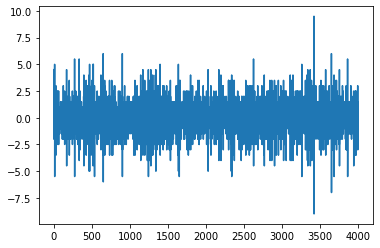

In [23]:
plt.plot(acc_v[:,3])

In [24]:
acc_v.shape

(3998, 4)

In [25]:
acc_b = []
for acc, rot in zip(acc_v, rot_matrices[2:]):
    acc_b.append(rot.T@acc[1:])
acc_b = np.array(acc_b)

In [26]:
acc_b_noised = []
for ac in acc_b:
    acc_b_noised.append(ac + np.array([0.01*np.random.normal(),0.01*np.random.normal(),0.01*np.random.normal()]))
acc_b_noised = np.array(acc_b_noised)
acc_b_noised = np.column_stack((t_acc, acc_b_noised))
acc_b = np.column_stack((t_acc, acc_b))

In [27]:
tvecs_noised = tvecs_noised[::4]
rot_matrices_noised = rot_matrices_noised[::4]
t_visual = t[::4]

In [28]:
tvecs_noised = tvecs_noised[1:]
rot_matrices_noised = rot_matrices_noised[1:]
t_visual = t_visual[1:]

In [29]:
tvecs = tvecs[4:]
rot_matrices = rot_matrices[4:]
t = t[4:]

In [30]:
acc_b_noised = acc_b_noised[2:]
gyro_noised = gyro_noised[2:]
gyro_clear = gyro_clear[2:]

In [31]:
acc_b = acc_b[2:]

In [32]:
a1 = np.ones(t_visual.shape[0])
b1 = np.ones(tvecs.shape[0])
c1 = np.ones(acc_b_noised.shape[0])

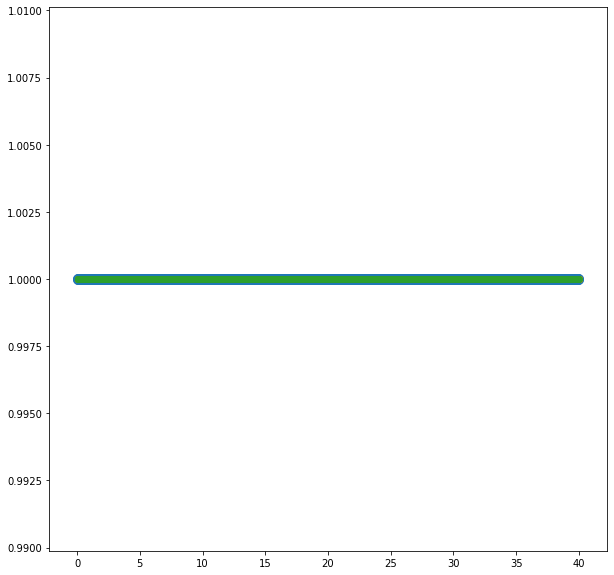

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(t_visual, a1, s = 100)
plt.scatter(t, b1)
plt.scatter(acc_b_noised[:,0], c1, alpha = 0.5)
plt.show()

In [72]:
plt.plot(acc_v[:,1:])

In [35]:
tvec.shape

(3996, 4)

In [36]:
np.savez("dataset_simulation_noised", gyro = gyro_noised, acc_linear = acc_b_noised, visual_rot = rot_matrices_noised, visual_tvec = tvecs_noised, visual_time = t_visual)

In [37]:
np.savez("dataset_simulation_clear", gyro = gyro_clear, acc_linear = acc_b, visual_rot = rot_matrices[::4], visual_tvec = tvecs[::4], visual_time = t_visual)

In [38]:
np.savez("dataset_simulation_gt", rot_gt = rot_matrices, tvec_gt = tvecs, time_gt = t)